# **Project Name**    - Mental Health in Tech Survey EDA 

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name -** Aswathy Gopalakrishnan

# **Project Summary -**

The project explores the survey data to understand the factors influencing mental health issues and attitudes in the workplace, with a focus on geographic disparities, workplace support, and employer resources. Our goal is to identify key predictors, compare different sectors, and visualize patterns to derive insights that can help improve and develop supportive workplace policies.

This analysis is based on a dataset derived from a 2014 survey that investigated attitudes towards mental health and the prevalence of mental health disorders within the tech workplace. The dataset includes responses from employees across various countries and offers insights into mental health awareness, stigma, workplace policies, and help-seeking behavior. An ongoing survey from 2016 also provides additional data for future comparison.

The analysis is divided to different stages to analyse various factors:
1. Descriptive and Distribution Analysis - Examining the baseline distribution of demographics, age, and gender in the dataset, alongside correlation assessments to identify initial associations.
2. Analysis of Companies' Attitude towards Mental Health Issues including Sector Analysis - Analysing how the companies are responding to mental health issues. Are they equaly vaidated as a physical health issue? For each feature, it is investigated the differences between sectors, particularly tech versus non-tech, in mental health support, interference, and attitudes within organizations.
3. Employee Attitude Analysis - Analysing the attitude of employees towards it. How comfortable are they with sharing it? Is it easy to share mental health issues as physical health issues?
4. Key influencing Factors - Identifying and evaluating the primary predictors impacting mental health issues and workplace attitudes through statistical and visualisation approaches.
5. Geographic Analysis - Analyzing and comparing the prevalence and perceptions of mental health issues across different countries to uncover regional disparities.


# **GitHub Link -**

https://github.com/aswathy2410/Mental-Health-Survey-EDA

# **Problem Statement**

This study aims to explore the prevalence, determinants, and geographic variations of mental health issues and attitudes in the workplace, with a particular focus on understanding how demographic factors, organizational support, and sectoral differences influence mental health outcomes and help-seeking behavior among employees.

#### **Define Your Business Objective?**

To identify key factors and organizational characteristics that influence employee mental health and help-seeking behavior, enabling organizations to develop targeted strategies and workplace policies that promote mental well-being, reduce stigma, and improve overall employee productivity and satisfaction.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [50]:
# Import Libraries
import pandas as pd          
import numpy as np           
import matplotlib.pyplot as plt  
import seaborn as sns          
import missingno as msno 
from scipy.stats import chi2_contingency
sns.set(style="whitegrid")

### Dataset Loading

In [51]:
# Load Dataset
df = pd.read_csv('survey.csv')

### Dataset First View

In [52]:
# Dataset first look
print("\nFirst few rows:")
df.head()


First few rows:


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Dataset Rows & Columns count

In [53]:
# Dataset Rows & Columns count
print("Dataset shape:", df.shape)

Dataset shape: (1259, 27)


### Dataset Information

In [54]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

#### Duplicate Values

In [55]:
# Dataset Duplicate Value Count
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


#### Missing Values/Null Values

In [56]:
# Missing Values/Null Values Count
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


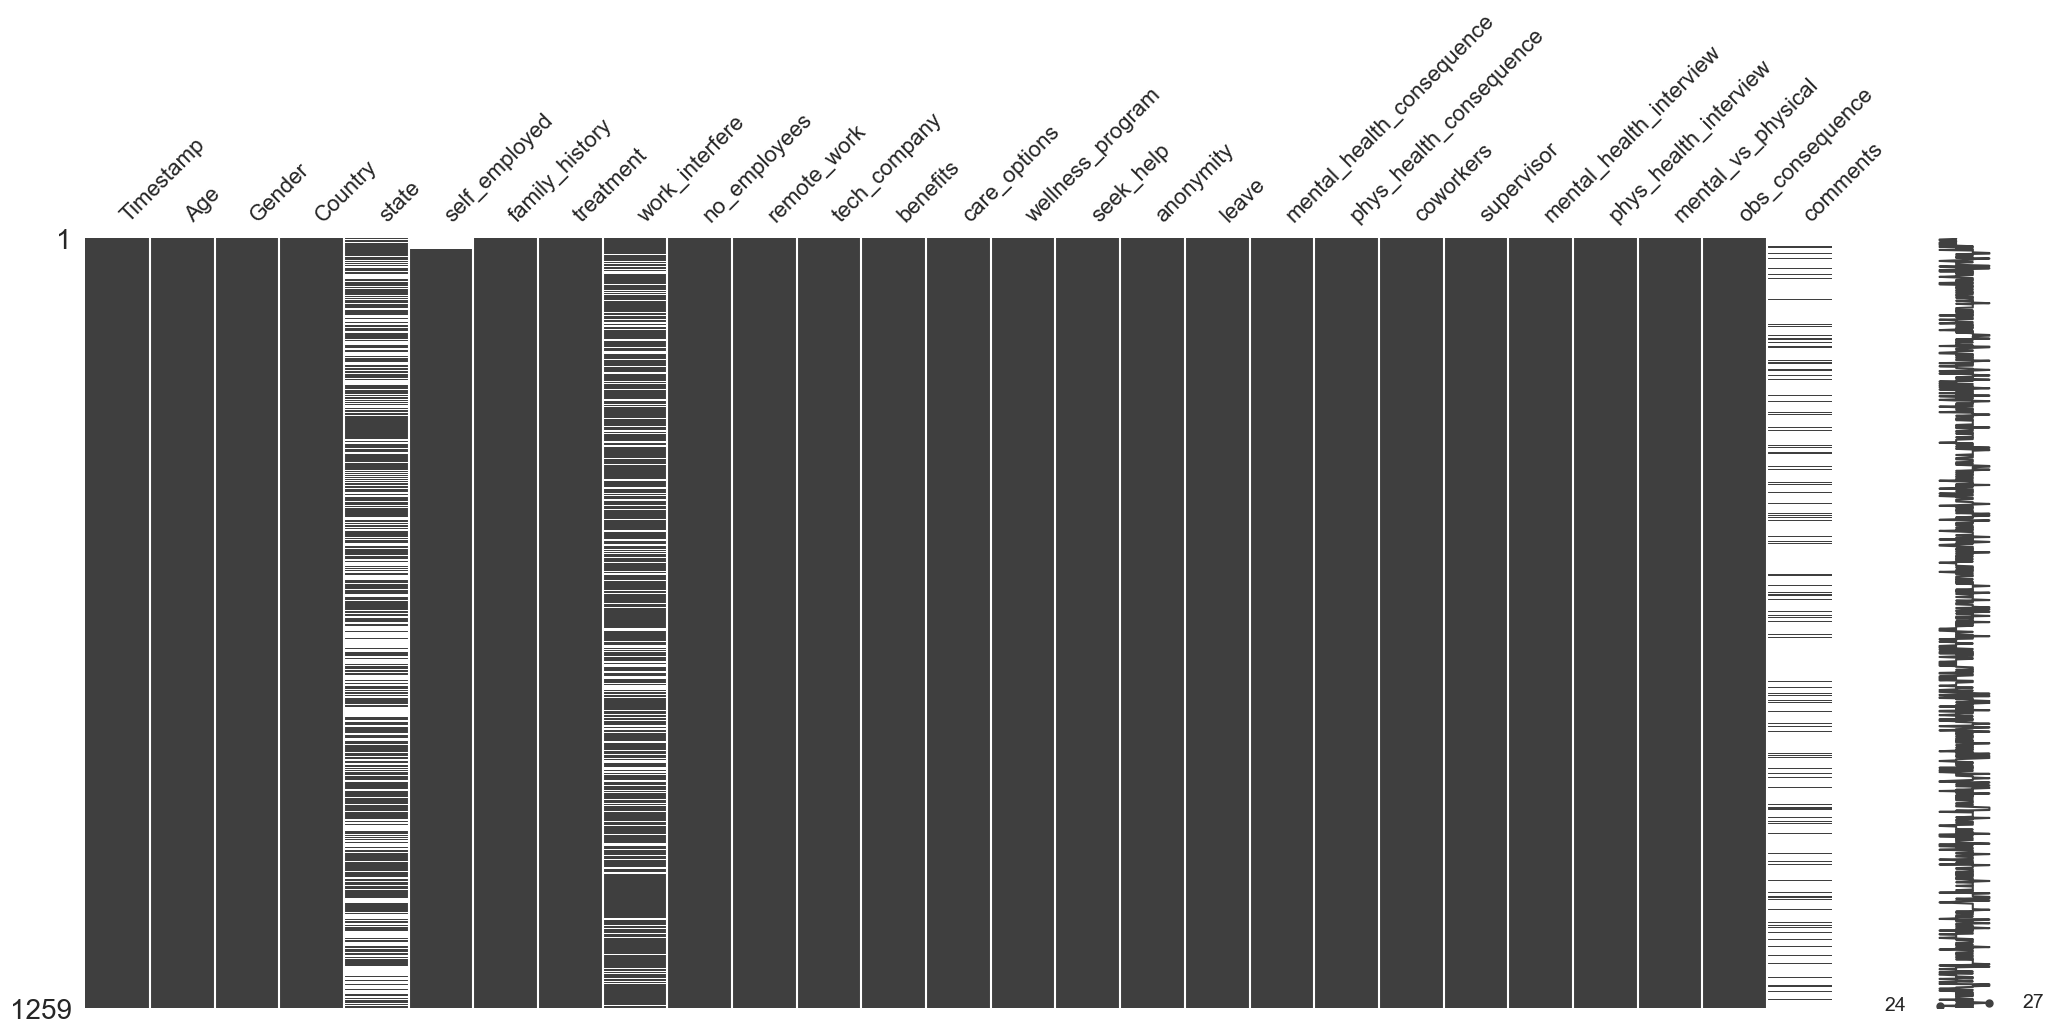

In [57]:
# Visualizing the missing values
msno.matrix(df)
plt.show()

In [58]:
df['self_employed'] = df['self_employed'].fillna('Not Mentioned')
df['work_interfere'] = df['work_interfere'].fillna('Not Mentioned')
df['state'] = df['state'].fillna('Not Mentioned')
df['comments'] = df['comments'].fillna('No Comments Provided')
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
dtype: int64


### What did you know about your dataset?

The dataset comprises 1,259 responses and includes 26 features, capturing a wide range of demographic, employment, and attitude-related variables relevant to understanding mental health perceptions and experiences in the workplace. Except age, all others are categorical columns. There were no duplicate rows.However, some categorical features had missing values which were marked as 'Not Mentioned' or 'Not Provided' based on the context.

## ***2. Understanding Your Variables***

In [59]:
# Dataset Columns
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [60]:
# Dataset Describe
# Numerical features
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [61]:
# Categorical features
df.describe(include=['object'])

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
unique,1246,49,48,46,3,2,2,5,6,2,...,5,3,3,3,3,3,3,3,2,161
top,2014-08-27 12:43:28,Male,United States,Not Mentioned,No,No,Yes,Sometimes,6-25,No,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,No Comments Provided
freq,2,615,751,515,1095,767,637,465,290,883,...,563,490,925,774,516,1008,557,576,1075,1095


### Variables Description

The data shows a predominance of male respondents from the United States, with the majority not self-employed and reporting some level of work interference. Attitudes about mental health such as willingness to discuss issues with colleagues or supervisors vary widely, while organizational support features like benefits and wellness programs are also captured. Notably, the age data shows inconsistencies, indicating the need for cleaning. also, in gender, there are too many values showing spelling and confusions while entering, which must be grouped and aligned better for analysis. But overall, these variables provide a comprehensive view of mental health perceptions and workplace support across different regions and organizational sizes.

### Check Unique Values for each variable.

In [62]:
# Check Unique Values for each variable.
for col in df.columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print('-' * 50)

Unique values in 'Timestamp':
['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
--------------------------------------------------
Unique values in 'Age':
[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
--------------------------------------------------
Unique values in 'Gender':
['Female' 'M' 'Male' 'male' 'fem

## 3. ***Data Wrangling***

### Data Wrangling Code

The values in the gender column seems manually entered. The spelling mistakes and ambiguous replies need to be grouped properly for better analysis and visualisation. For this, data mapping is doen to make sure, they are grouped properly.

In [63]:
gender_map = {
    'male': 'Male',
    'male ': 'Male',
    ' male ' :'Male',
    'm': 'Male',
    'M' : 'Male',
    'make': 'Male',
    'man': 'Male',
    'mal': 'Male',
    'mail': 'Male',
    'Mail': 'Male',
    'maile': 'Male',
    'malr': 'Male',
    'Cis male': 'Male',
    'Cis Male': 'Male',
    'cis male': 'Male',
    'cis man' : 'Male',
    'male (cis)': 'Male',
    'msle' : 'Male',
    'male cis' : 'Male',
    'cis-female': 'Female',
    'cis-female/femme': 'Female',
    'Cis female': 'Female',
    'cis female': 'Female',
    'female': 'Female',
    'female ': 'Female',
    'femake' : 'Female',
    'female (cis)' : 'Female',
    'femail' : 'Female',
    'f': 'Female',
    'F': 'Female',
    'woman': 'Female',
    'Woman': 'Female',
    'trans-female': 'Transgender',
    'Trans woman': 'Transgender',
    'trans woman': 'Transgender',
    'transgender' :'Transgender',
    'female (trans)': 'Transgender',
    'queer/she/they': 'Non-binary',
    'queer' : 'Non-binary',
    'male-ish' : 'Non-binary',
    'enby': 'Non-binary',
    'non-binary': 'Non-binary',
    'fluid': 'Non-binary',
    'genderqueer': 'Non-binary',
    'androgyne': 'Non-binary',
    'agender': 'Non-binary',
    'male leaning androgynous' : 'Non-binary',
    'guy (-ish) ^_^' : 'Non-binary',
    'ostensibly male, unsure what that really means' : 'Non-binary',
    'neuter': 'Other',
    'something kinda male?': 'Other',
    'a little about you' : 'Other',
    'all': 'Other',
    'p' : 'Other',
    'prefer not to say': 'Prefer not to say',
    'nah': 'Prefer not to say',
}



In [64]:
# Replace entries with standardized 
df['Gender'] = df['Gender'].str.strip().str.lower()
df['Gender'] = df['Gender'].replace(gender_map)
print(df['Gender'].value_counts())

Gender
Male                 990
Female               247
Non-binary            12
Other                  5
Transgender            4
Prefer not to say      1
Name: count, dtype: int64


The age column has negative values, unusually large and small numbers. These are replaced by median imputation.

In [65]:
# Remove negative and unreasonably large and small ages
df = df[(df['Age'] >= 0) & (df['Age'] <= 120)]
median_age = df['Age'].median()
df.loc[df['Age'] < 20, 'Age'] = median_age
df.loc[df['Age'] > 120, 'Age'] = median_age


An additional age bin column is created for future analysises

In [66]:
bins = [0, 25, 35, 45, 55, 65, 120]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In no_employess, some columns have dates 01-May and jun-25 as values. Since we have groups for employees more than 25. This is probably an error while entering. May must for 05 and Jun must be for 06, making 01-05 and 06-25 number of employees.

In [67]:
df['no_employees'] = df['no_employees'].replace(
    ['01-May', 'Jun-25'],  
    ['01-05', '6-25']
)

In [68]:
# Verify if it changed properly
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Age_Group
0,2014-08-27 11:29:31,37,Female,United States,IL,Not Mentioned,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,No Comments Provided,35-44
1,2014-08-27 11:29:37,44,Male,United States,IN,Not Mentioned,No,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,No Comments Provided,35-44
2,2014-08-27 11:29:44,32,Male,Canada,Not Mentioned,Not Mentioned,No,No,Rarely,6-25,...,No,No,Yes,Yes,Yes,Yes,No,No,No Comments Provided,25-34
3,2014-08-27 11:29:46,31,Male,United Kingdom,Not Mentioned,Not Mentioned,Yes,Yes,Often,26-100,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,No Comments Provided,25-34
4,2014-08-27 11:30:22,31,Male,United States,TX,Not Mentioned,No,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,No Comments Provided,25-34


### What all manipulations have you done and insights you found?

The genders were mapped to fit into 5 categories - male, female, transgender, non-binary and others.The negative and abnormal values in age are corrected using median imputation. The unual values 01-May ans June-25 in no_employees were corrected to 01-05 and 05-25 respectively. An additional column was created by age bins for future visualizations.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

The data analysisis divided into 4 parts:

### **A. Descriptive and Distribution Analysis** 
Examining the baseline distribution of age, gender, and demographics,  in the dataset, alongside correlation assessments to identify initial associations.

#### Age Distribution

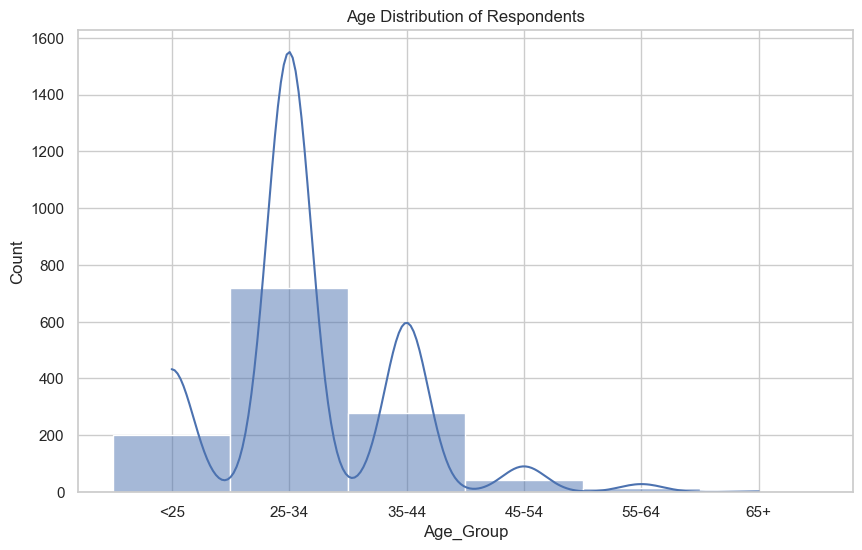

In [69]:
# Distibution of age group in survey
plt.figure(figsize=(10,6))
sns.histplot(df['Age_Group'].dropna(), bins=20, kde=True)
plt.title('Age Distribution of Respondents')
plt.xlabel('Age_Group')
plt.ylabel('Count')
plt.show()

This chart helps to realise the age grooup of people participated in the survey.From the graph, it is clear that, highest number of people belong to the age group 25-34. These age-groups belong to the working class in their initial stages of career or transitioning to senior managerial roles. They could be the right peole to do the survey on as they can help us understand the managerial and institutional problems and impacts of benefits and services provided from an employee level perspective.

#### Gender Distribution

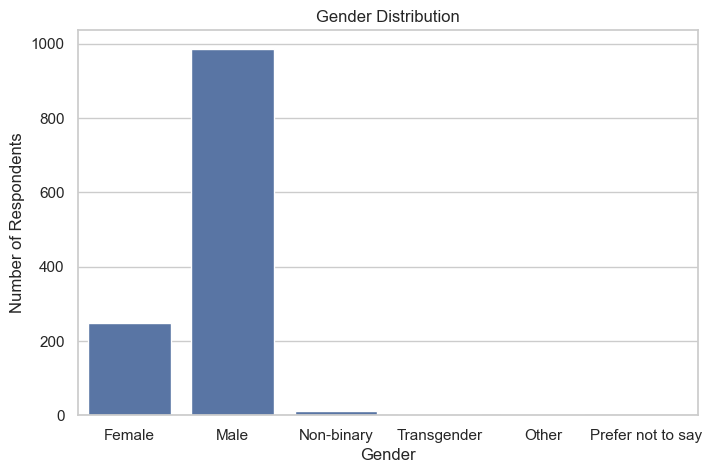

In [70]:
# Distibution of gender in survey
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.ylabel('Number of Respondents')
plt.show()

The bar chart helps us understand the distribution of different genders in the survey, trying to help us understand if the datset is biased towards a certain gender. However, if we look at the tech industries, they are primarily dominated by men. This reflect in the data with close to 1000 entries of male candidates. Non-binary and transgender candidates are very low indicating their unwillingness or maybe neglogence on the survey side to consider them properly. These group may have more mental health issues faced in genral from the society as well as in an organisational atmosphere. So, it would be good to include more data to represent these underrepresented groups.

#### Gender Vs Treatment

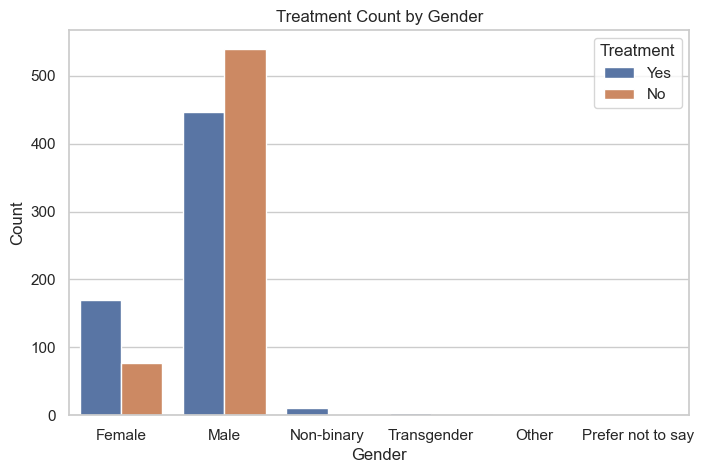

In [102]:
plt.figure(figsize=(8,5))
sns.countplot(
    x='Gender',
    hue='treatment',
    data=df,
)
plt.title('Treatment Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()

Even though less in number, the chart illustrates that they tend to be more open to treatments. Females being allowed to be vulnerable could be the reason for this. The stigma around male mental health needs to be addressed.

#### Country Distribution

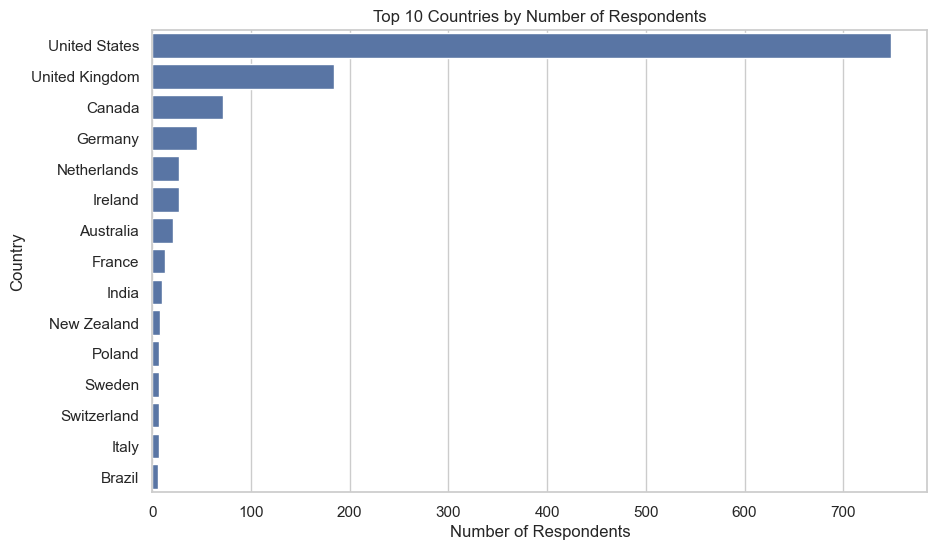

In [72]:
# Country distribution in the survey
top_countries = df['Country'].value_counts().head(15)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Number of Respondents')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.show()

During the data understanding stage, it was noticed that there is data from 48 countries. However which countries represent major portions of the data is visualised here, by picking the top 10 countries from the data. Clearly, US has the highest by a significant margin, followed by the United Kingdom and Canada. Other countries such as Germany, Netherlands, and Ireland show moderate levels of participation, while countries like Australia, France, India, and Brazil have fewer respondents. 

#### Age Distribution by Work Interference

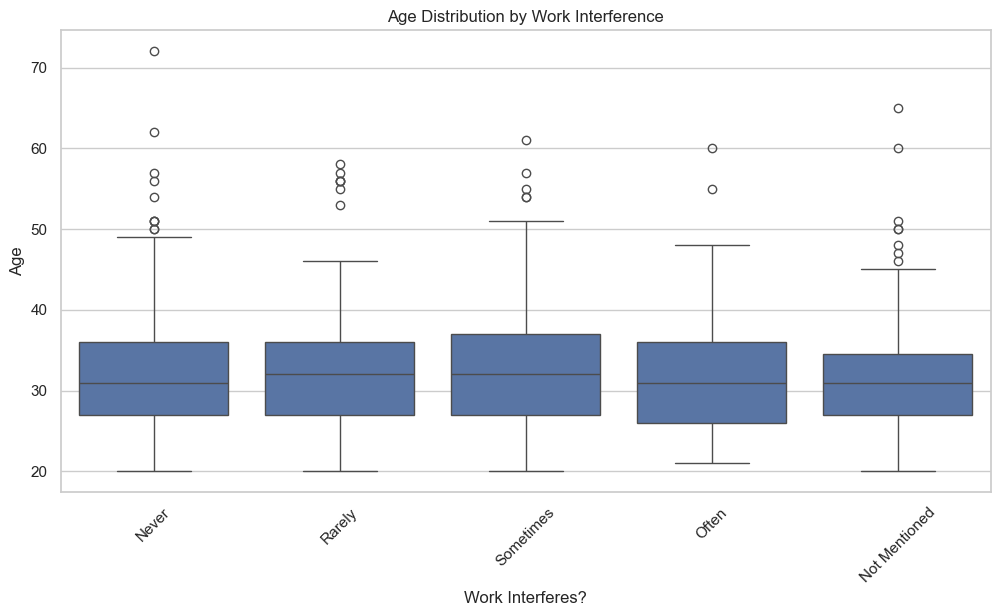

In [73]:
plt.figure(figsize=(12,6))
sns.boxplot(x='work_interfere', y='Age', data=df, order=['Never', 'Rarely', 'Sometimes', 'Often', 'Not Mentioned'])
plt.title('Age Distribution by Work Interference')
plt.xlabel('Work Interferes?')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


The bar chart is to help us understant the age group of the ones that admits the mental health isues affect their work. It is observed that the younger ones tends to be more affected in this. More efforts must be made to make them feel safe and seen in the work environment. The younger ones tend to take up more work and stress in the intial career stage for more exposure and visibilty. Some monitoring must be made to make sure their needs are addressed.

#### Age Distribution by Treatment

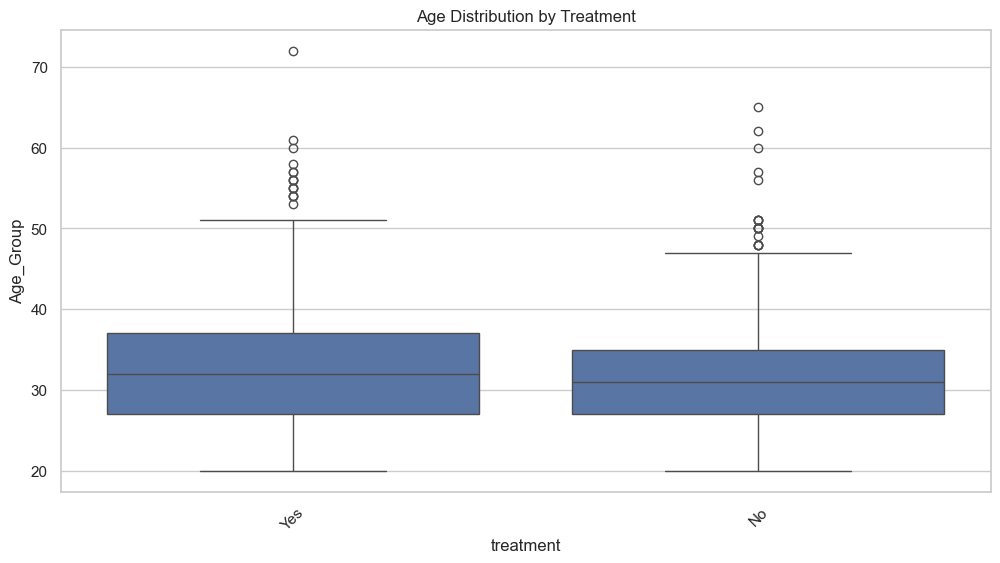

In [74]:
plt.figure(figsize=(12,6))
sns.boxplot(x='treatment', y='Age', data=df, order=['Yes', 'No'])
plt.title('Age Distribution by Treatment')
plt.xlabel('treatment')
plt.ylabel('Age_Group')
plt.xticks(rotation=45)
plt.show()

It was already observed that younger age group is more affected. In order to make sure if there seeking treatment, this box plot was visualised. Clearly, the older ones dominate the yes side, and there are numerous that belongs to the 25-34 category in the no group reaffirming our observed and the need to monitor employees iin that category more.

#### Insights from the Analysis
Majority of people participated are in the age group 25-34, majorly from US, UK and Canada, dominated by males. More diverse data must be collected to ensure a bias free analysis. the data has under-represented the rest of the genders and countries. However, the selection of age seems appropriate. However, a more balanced dataset is required for a less biased approach.

### **B. Analysis of Companies' Attitude towards Mental Health Issues including Sector Analysis**
Now that the key age group is identified, let's analyse further to see how the companies are responding to mental health issues, whether they are equaly vaidated as a physical health issue? For each feature, it is also analysed if there is an effect by the company type - tech or no-tech.

#### Employee Benefits Count

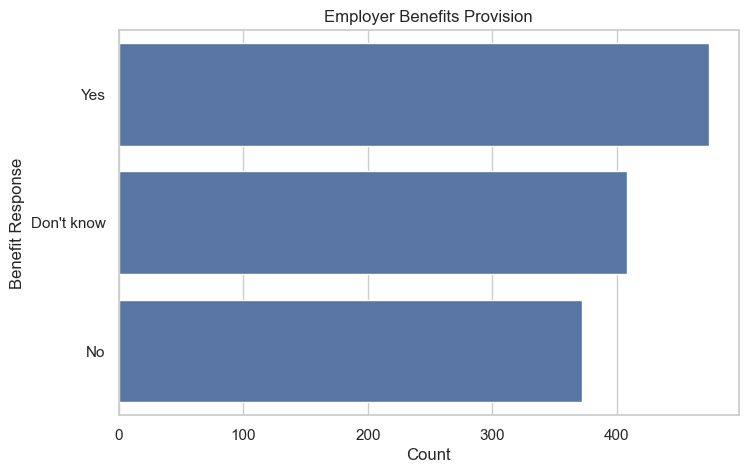

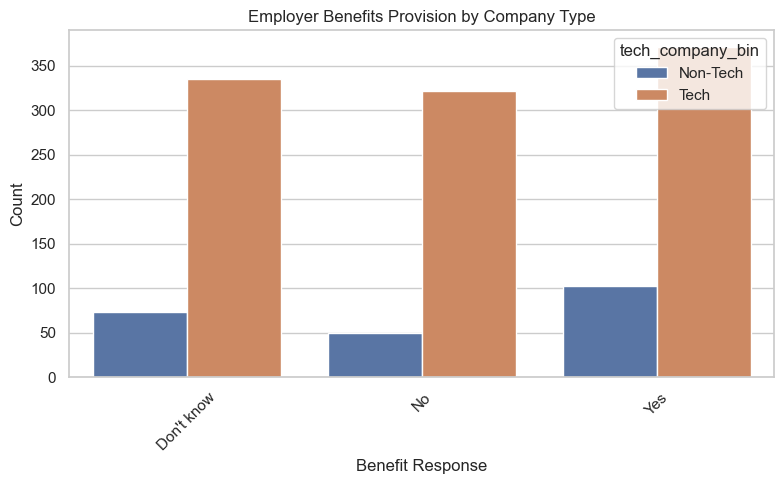

In [75]:
benefits_counts = df['benefits'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=benefits_counts.values, y=benefits_counts.index)
plt.title('Employer Benefits Provision')
plt.xlabel('Count')
plt.ylabel('Benefit Response')
plt.show()

# Sector based graph
# Create 'tech_company_bin' 
df['tech_company_bin'] = df['tech_company'].apply(lambda x: 'Tech' if x.lower().strip() == 'yes' else 'Non-Tech')

# Group by benefits and company type, count
benefits_counts = df.groupby(['benefits', 'tech_company_bin']).size().reset_index(name='counts')

plt.figure(figsize=(8,5))
sns.barplot(x='benefits', y='counts', hue='tech_company_bin', data=benefits_counts)
plt.title('Employer Benefits Provision by Company Type')
plt.xlabel('Benefit Response')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The first chart illustrates how many of the participants' companies provide employee benefits. More than 500, said yes. However, more than 400, said 'Don't know' which shows the lack of awarness about these systems in the organisations. Organisations need to keep the employees updated and awarness needs to be given properly about these topics and the benefits provided so that the ones that need help can avail it.

In the second chart, the benefits response based on the sectors is analysed. There are more tech companies compared to the non-tech companies, and the percentage of propotion in terms of benefits seems similar in both, requiring both sectors showing lack of awarness systems.

#### Care Options provide by Employer

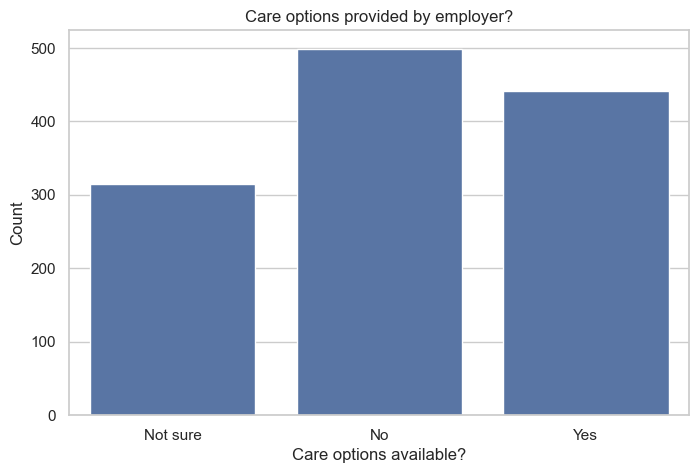

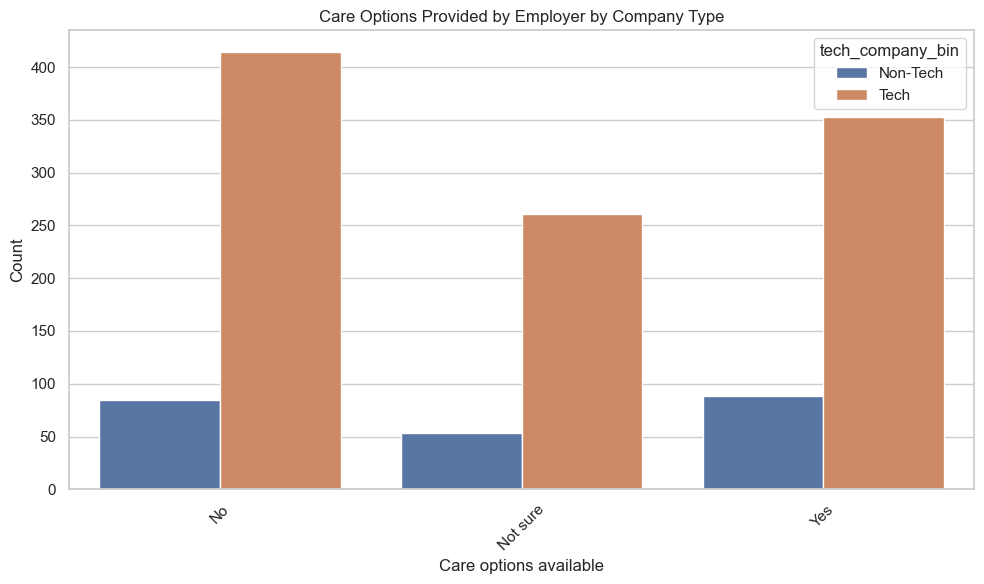

In [76]:
plt.figure(figsize=(8,5))
sns.countplot(x='care_options', data=df)
plt.title('Care options provided by employer?')
plt.ylabel('Count')
plt.xlabel('Care options available?')
plt.show()

# for sector based graph
care_counts = df.groupby(['care_options', 'tech_company_bin']).size().reset_index(name='counts')

plt.figure(figsize=(10,6))
sns.barplot(x='care_options', y='counts', hue='tech_company_bin', data=care_counts)
plt.title('Care Options Provided by Employer by Company Type')
plt.xlabel('Care options available')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The first chart shows how the care options are provide by the employers. It shows a similar pattern as in previous graph showing the unawareness of the employees regarding mental health care services provided by the employer. More measures must be taken to spread awareness among employees. Even in sector based visualization, similar pattern is observed.

#### Wellness Programs in Office

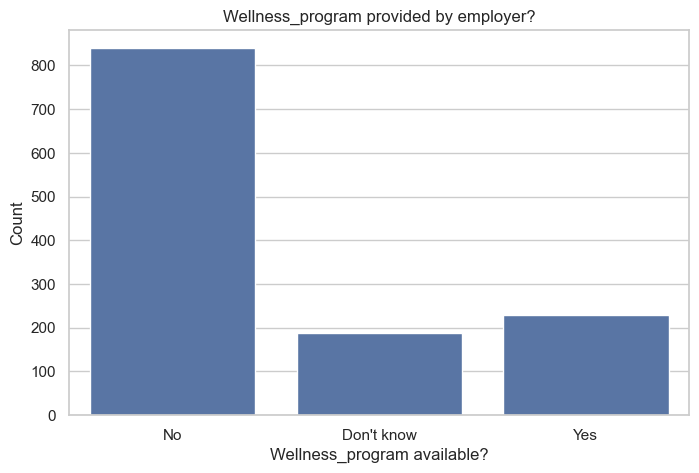

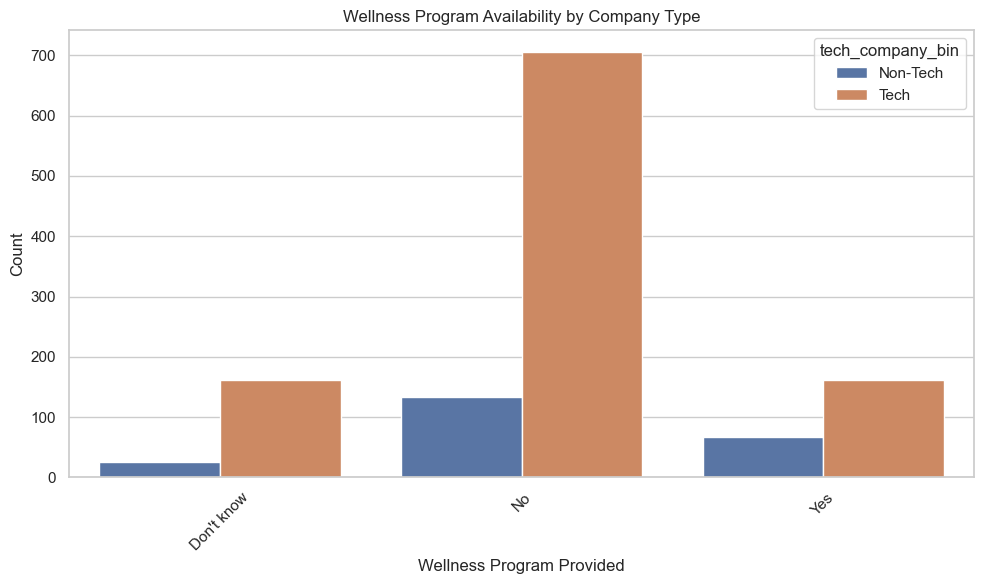

In [77]:
plt.figure(figsize=(8,5))
sns.countplot(x='wellness_program', data=df)
plt.title('Wellness_program provided by employer?')
plt.ylabel('Count')
plt.xlabel('Wellness_program available?')
plt.show()

# For sector based graph
wellness_counts = df.groupby(['wellness_program', 'tech_company_bin']).size().reset_index(name='counts')

plt.figure(figsize=(10,6))
sns.barplot(x='wellness_program', y='counts', hue='tech_company_bin', data=wellness_counts)
plt.title('Wellness Program Availability by Company Type')
plt.xlabel('Wellness Program Provided')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Both the charts show if the organisations are providing wellness programs to the employess. Signifant amount of candidates replied with a 'No' indicationg the lack of proper programs to take care of mental health of employees. Organisations must put in more effort to build a safe environment for the employees.

#### Employer provide resources to learn more about mental health issues and how to seek help?


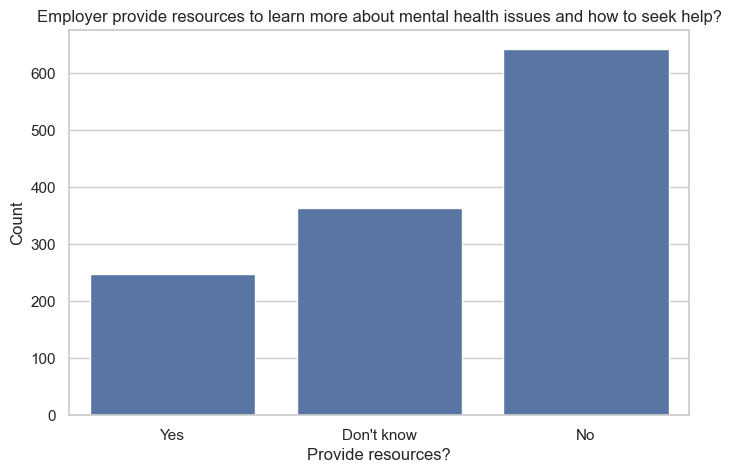

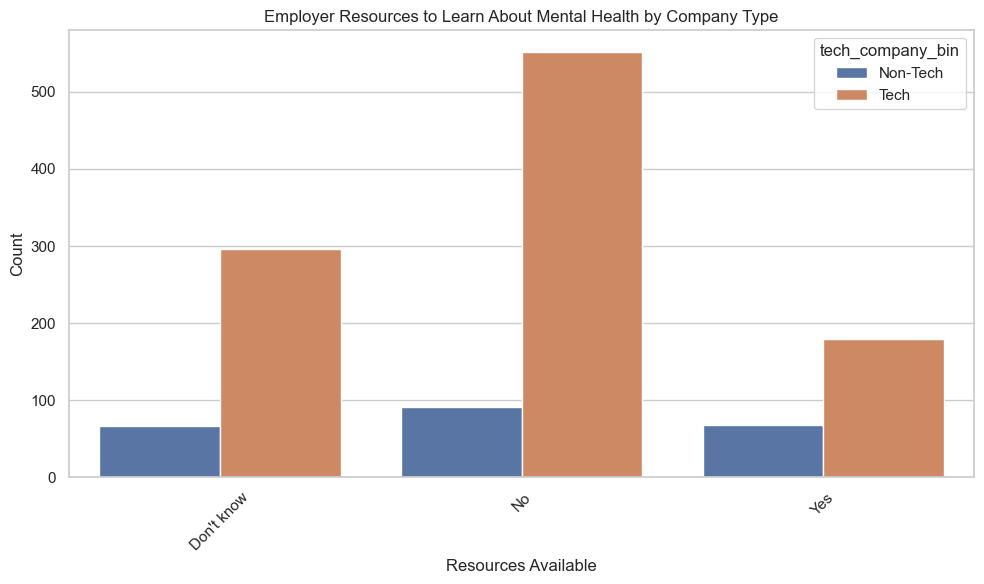

In [78]:
plt.figure(figsize=(8,5))
sns.countplot(x='seek_help', data=df)
plt.title('Employer provide resources to learn more about mental health issues and how to seek help?')
plt.ylabel('Count')
plt.xlabel('Provide resources?')
plt.show()

# For sector based graph
resources_counts = df.groupby(['seek_help', 'tech_company_bin']).size().reset_index(name='counts')

plt.figure(figsize=(10,6))
sns.barplot(x='seek_help', y='counts', hue='tech_company_bin', data=resources_counts)
plt.title('Employer Resources to Learn About Mental Health by Company Type')
plt.xlabel('Resources Available')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Both the charts show whether the employers provide necessary resources to help with mental health issues. Most said No or Don't know showing the negligence on employer's side.

#### Anonimity Maintainance

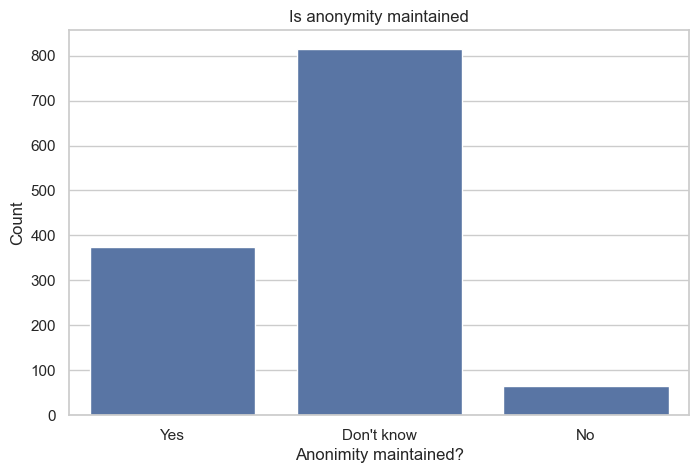

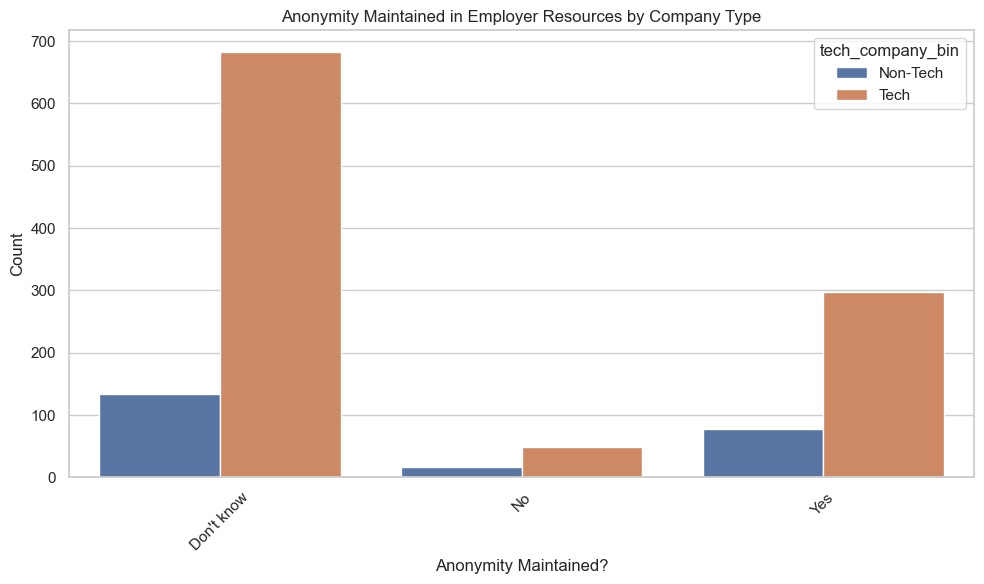

In [79]:
plt.figure(figsize=(8,5))
sns.countplot(x='anonymity', data=df)
plt.title('Is anonymity maintained')
plt.ylabel('Count')
plt.xlabel('Anonimity maintained?')
plt.show()

# For sector based graph
anonymity_counts = df.groupby(['anonymity', 'tech_company_bin']).size().reset_index(name='counts')

plt.figure(figsize=(10,6))
sns.barplot(x='anonymity', y='counts', hue='tech_company_bin', data=anonymity_counts)
plt.title('Anonymity Maintained in Employer Resources by Company Type')
plt.xlabel('Anonymity Maintained?')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Employer Perception on Mental and Physical Health

Major portion is not sure if the details provided on mental health safe in their employers' hand. Around 400 says yes and close 100 outright says no. The ambiguity around transparency could be onee reason why many are not willing to take help from the organisation. Proper guidelines must be given and non-disclosure agreements can be brought in to make things more transparent to the employees.

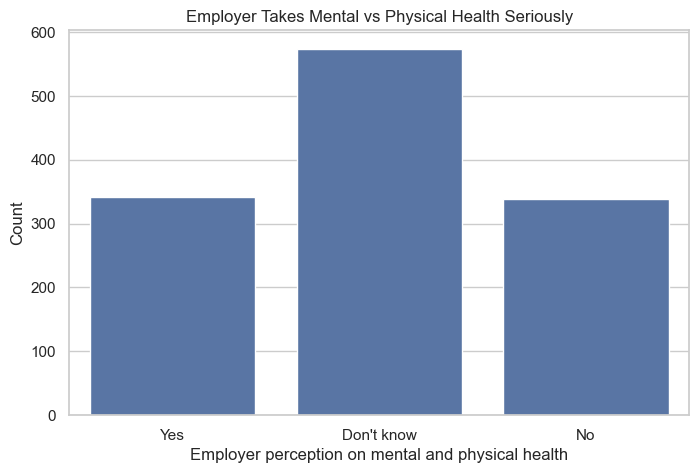

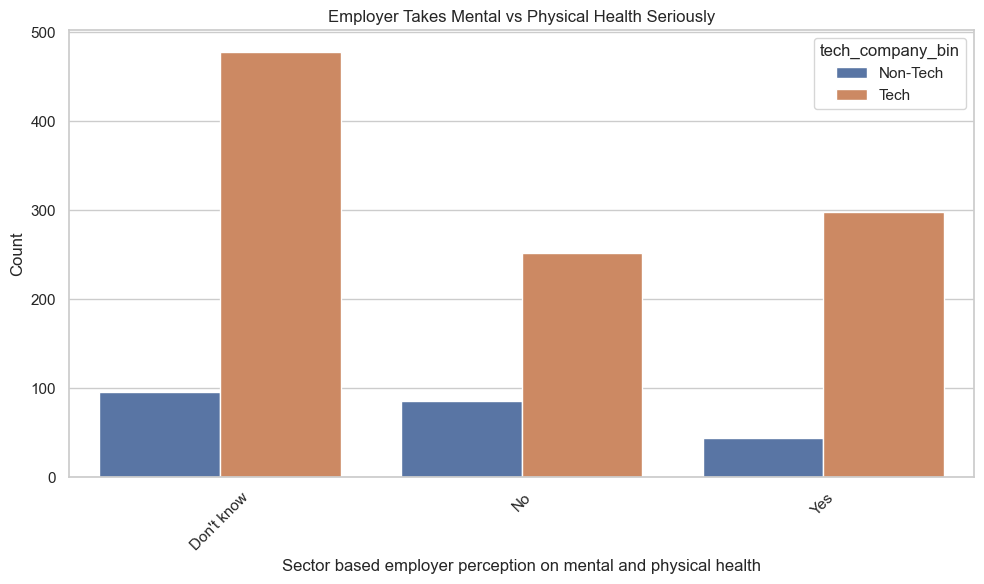

In [80]:
plt.figure(figsize=(8,5))
sns.countplot(x='mental_vs_physical', data=df)
plt.title('Employer Takes Mental vs Physical Health Seriously')
plt.ylabel('Count')
plt.xlabel('Employer perception on mental and physical health')
plt.show()

# For sector based graph
menvsphy_counts = df.groupby(['mental_vs_physical', 'tech_company_bin']).size().reset_index(name='counts')

plt.figure(figsize=(10,6))
sns.barplot(x='mental_vs_physical', y='counts', hue='tech_company_bin', data=menvsphy_counts)
plt.title('Employer Takes Mental vs Physical Health Seriously')
plt.xlabel('Sector based employer perception on mental and physical health')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Majority responsed with don't know in first chart, then a considerable amount says no. There were around 350 who said yes. The ambiguity around mental health awarness is clear in this. However, when we look at sector based evaluation, it appears tech companies have more yeses compared to non-tech companies. This shows that mental health may be better accepted in tech companies as the work involves a lot of mental stress, where as in companies where physicallabor is more, physical health would be prioritized more. 

#### Effect of company size

no_employees
6-25              289
26-100            288
More than 1000    281
100-500           176
1-5               160
500-1000           60
Name: count, dtype: int64


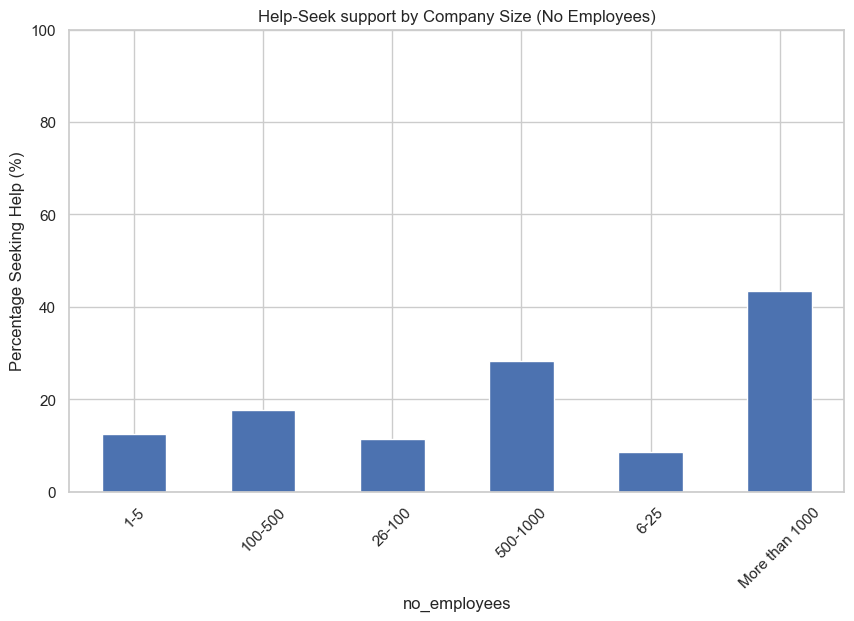

In [81]:
print(df['no_employees'].value_counts())
total_counts = df['no_employees'].value_counts()

# Count of people seeking help ("yes") per 'no_employees' value
help_counts = df[df['seek_help'].str.lower() == 'yes'].groupby('no_employees').size()

# Calculate percentage
percentage_help = (help_counts / total_counts) * 100

# Plot
percentage_help.plot(kind='bar', figsize=(10,6))
plt.ylabel('Percentage Seeking Help (%)')
plt.title('Help-Seek support by Company Size (No Employees)')
plt.ylim(0, 100) 
plt.xticks(rotation=45)
plt.show()

The larger companies are showing a higher percentage for providing help. MNCs may have established wellness programs. Smaller companies also need to set up a programs and benefits based their own capability

#### Insights from the Analysis

From the analyses, it is clear that, despite the sector and size of organisations, they all need to strengthen their employee policies and benefits in terms of mental health help. Wellness programs must be instilled and awarneness about the same must be established to promote the employees to avail it. For the ones availing it, provide strict non-disclosure agreement to enforce trust in the process.When it comes to acceptance between physical and mental health issues, companies that have jobs with physical stress prioritize that and the ones with mental stress, prioritize mental health more. However, on an overall basis, mental health issues need to be monitored better by all type of organisations.

### **C. Analysis on Employees' Attitude towards Sharing Mental Health Issues**

Now that we know how the organisations approach mental health issues, let's analyse the attitude of employees towards it. How comfortable are they with sharing it? Is it easy to share mental health issues as physical health issues?

#### Willingness to discuss with supervisor

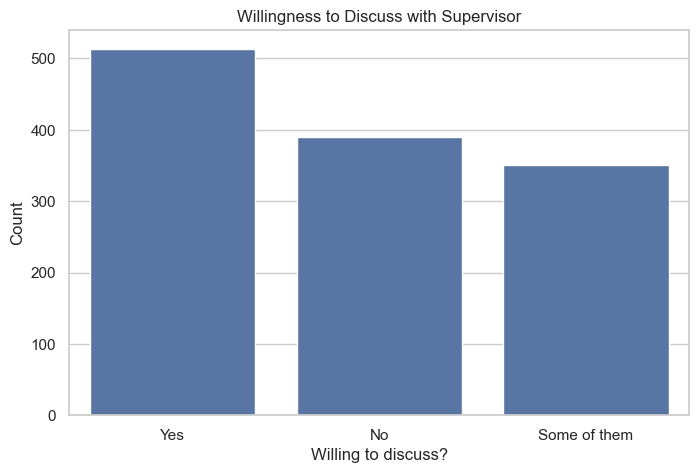

In [82]:
plt.figure(figsize=(8,5))
sns.countplot(x='supervisor', data=df)
plt.title('Willingness to Discuss with Supervisor')
plt.ylabel('Count')
plt.xlabel('Willing to discuss?')
plt.show()

Majority of the employers are comfortable sharing it with their supervisors, or at least some of the supervisors. This shows that if provided an enviroment to be more open, most employees are willing to share their mental health issues. This shows the importance of building the trust and providing a safe environment which, as we observed earlier, lack in majority of organisations. Steps need to be taken to improve this as we have discussed already.

#### Willingness to Discuss with Co-worker

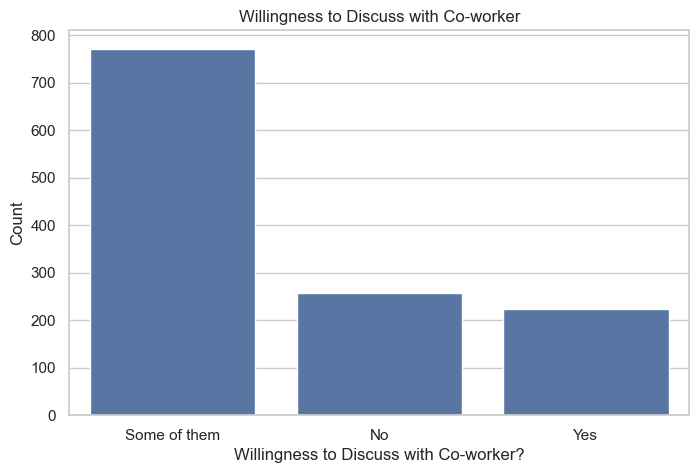

In [83]:
plt.figure(figsize=(8,5))
sns.countplot(x='coworkers', data=df)
plt.title('Willingness to Discuss with Co-worker')
plt.ylabel('Count')
plt.xlabel('Willingness to Discuss with Co-worker?')
plt.show()

The chart shows the willingness of an employer to discuss with their co-worker. Most of them are willing to share with some of their co-workers. However, there must be some reason for them not to do so. To analyse that, let's look at how the co-workers respond to the mental health issues.

#### Negative Consequence Observed in Co-workers

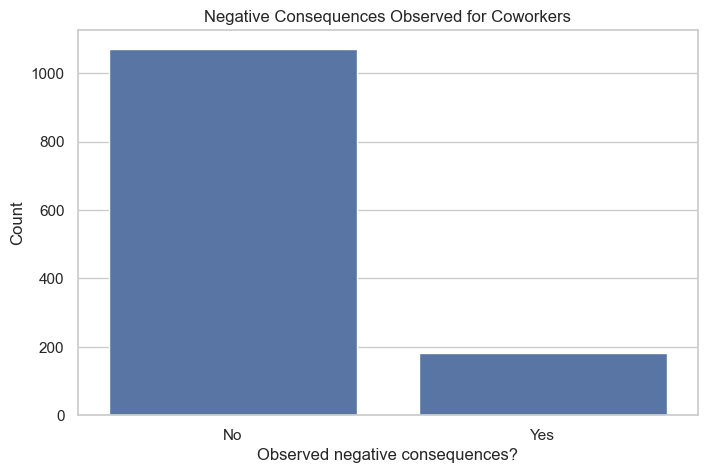

In [84]:
plt.figure(figsize=(8,5))
sns.countplot(x='obs_consequence', data=df)
plt.title('Negative Consequences Observed for Coworkers')
plt.ylabel('Count')
plt.xlabel('Observed negative consequences?')
plt.show()

The chart shows how many employees observed negative consequences after discussing with their co-worker. Less than 200 says yes which clearly shows their hesitance to discuss with fellow employees. The stigma around mental health is so high that people are worried of being isolated, targeted, and probably bullied if they become vulnerable with their own teammates which is very sad. Sessions must be provided on how to provide a safe environment and be supportive of each other's mental health issues. 

#### Perception of Negative Consequences of Discussing Health Issues (Mental and Physical)

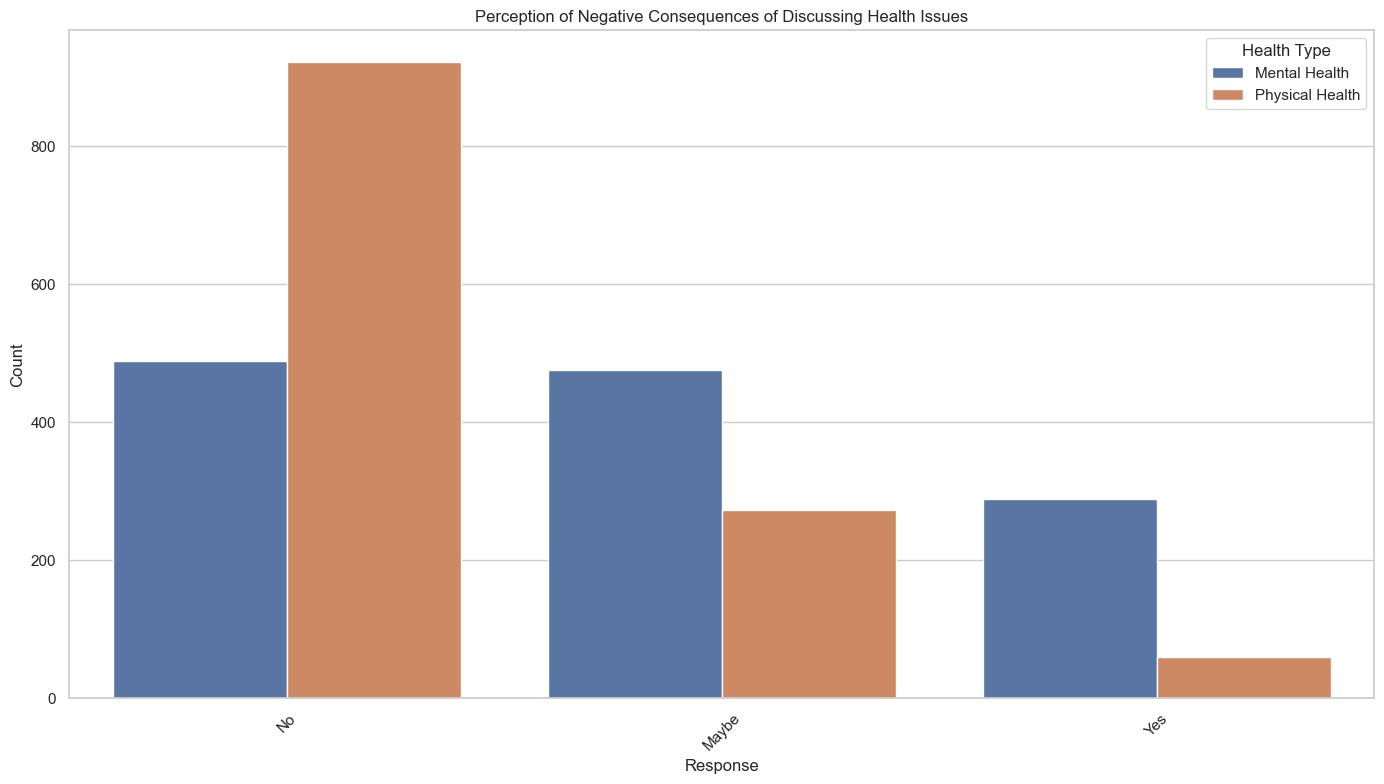

In [85]:
mental_counts = df['mental_health_consequence'].astype(str).value_counts().reset_index()
mental_counts.columns = ['Response', 'Count']
mental_counts['Type'] = 'Mental Health'

phys_counts = df['phys_health_consequence'].astype(str).value_counts().reset_index()
phys_counts.columns = ['Response', 'Count']
phys_counts['Type'] = 'Physical Health'

# Combine both
combined_df = pd.concat([mental_counts, phys_counts], ignore_index=True)

plt.figure(figsize=(14,8))
sns.barplot(x='Response', y='Count', hue='Type', data=combined_df)

plt.title('Perception of Negative Consequences of Discussing Health Issues')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Health Type')
plt.tight_layout()
plt.show()

The clustered bar chart shows whether discussing health issues with the employer has a negative consequence. When it comes to physical health, clearly, most says it doesn't has a negative consequence. However, in case of mental health issues, majority says yes + maybe which shows that they don't think it is as accepted as physical healthnissues. Mental health issues can have an equal or even worse effects on a person if not treated timely and appropriately. It is important for organisations to realise this, be more accepting, and implement appropriate measures to monitor them.

#### Willingness to Discuss Health Issues in Interviews

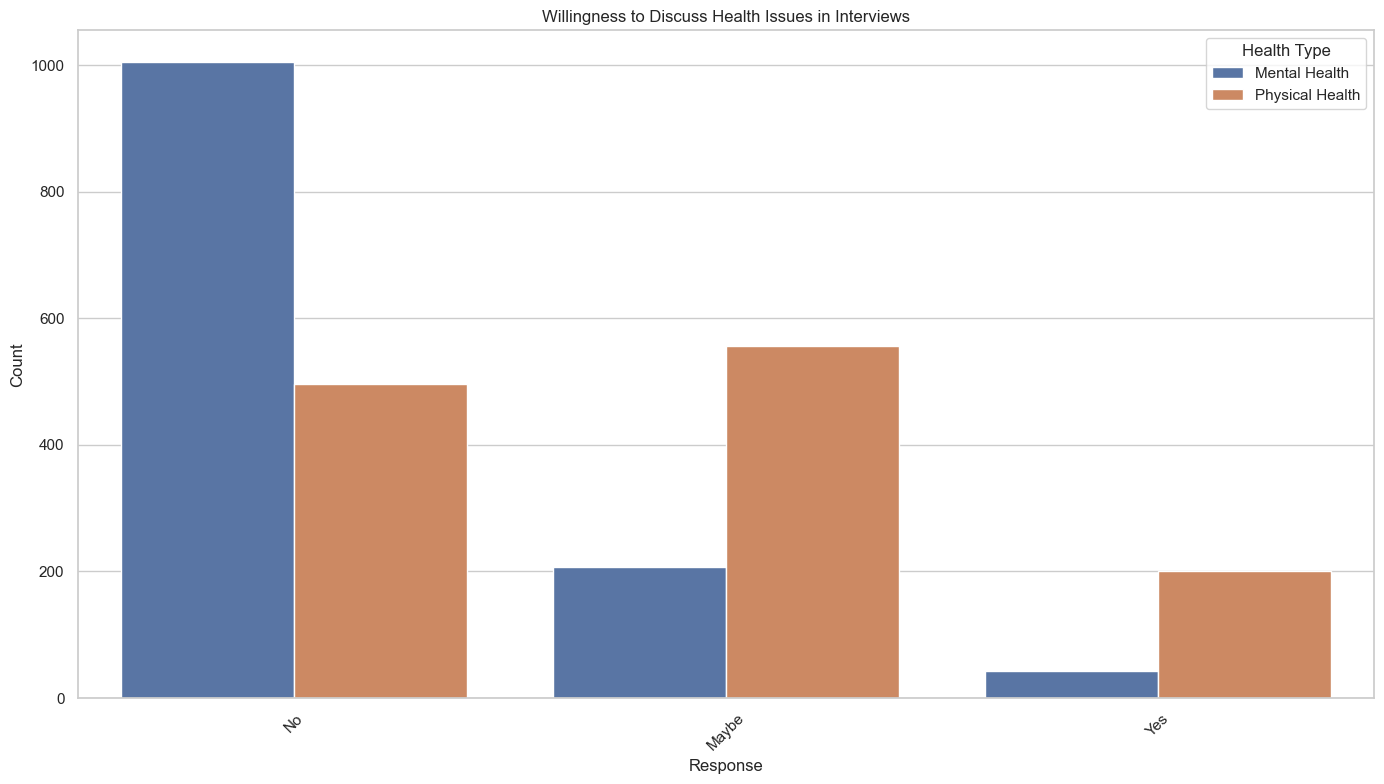

In [86]:
mental_counts = df['mental_health_interview'].astype(str).value_counts().reset_index()
mental_counts.columns = ['Response', 'Count']
mental_counts['Type'] = 'Mental Health'

phys_counts = df['phys_health_interview'].astype(str).value_counts().reset_index()
phys_counts.columns = ['Response', 'Count']
phys_counts['Type'] = 'Physical Health'

# Combine datasets
combined_df = pd.concat([mental_counts, phys_counts], ignore_index=True)

plt.figure(figsize=(14,8))
sns.barplot(x='Response', y='Count', hue='Type', data=combined_df)

plt.title('Willingness to Discuss Health Issues in Interviews')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Health Type')
plt.tight_layout()
plt.show()

The chart shows the willingness to discuss health issues in an interview. Close to 1000 are not willing to discuss mental health issues in interviews. However, they maybe willing to discuss physical issues in an interview. It is easier to hide mental health issues compared to physical health issues. The ones who are willing to expose their physical vulnerabilities must be the ones with visible problems. Most people tend to be scared of losing a job opportunity over these. However, a more accepting environment by addressing these issues positively without hindering their chances of getting the job may encourage more people to open up. If there are wellness programs established, interviewers can comfort them by explaining about it during interviews showing that the comapny is more accepting and this will inturn ensure a trust even when after they join the company.

#### Insights from the Analysis

Clearly, the stigma around mental health issues must be addressed. People must be made aware that is is as important as physical health. A safe environment to discuss the health issues must be provided by both supervisors and co-workers. Educational sessions can be arranged to improve the knowledge on these issues, and to improve their understanding on how to handle these situations in a positive and professional way.

### **D. Key influencing Factors**
In the initial analysis, we had found out that Age is a deciding factor on having more mental stress, and willingness to seek treatment. Here, we further perform an in-depth analysis to identify and evaluate the primary predictors impacting mental health issues and workplace attitudes through statistical and visualization approaches. 

#### Correlation Analysis of Categorical features

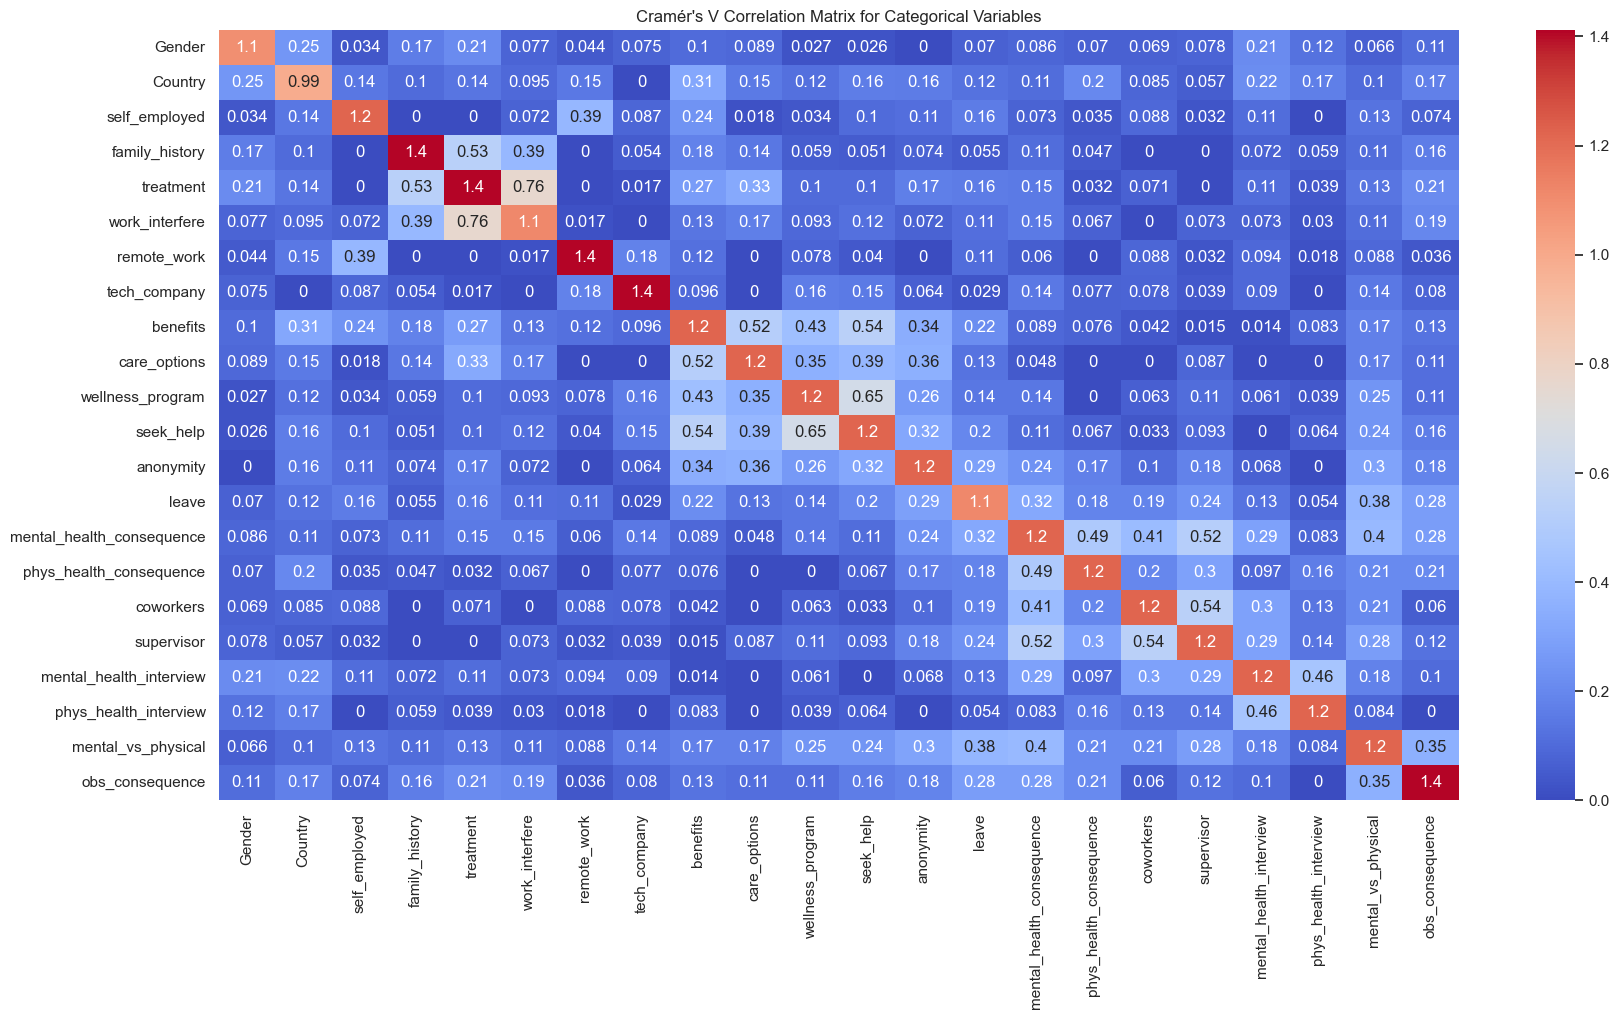

In [87]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Correct bias correction for small samples
    phi2_corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    r_corr = r - ((r - 1)**2) / (r * (k - 1))
    k_corr = k - ((k - 1)**2) / (k * (r - 1))
    return np.sqrt(phi2_corr / min((k_corr - 1), (r_corr - 1)))

categorical_cols = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

# Create an empty DataFrame to store the matrix
cramers_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols, dtype=float)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        confusion = pd.crosstab(df[col1], df[col2])
        cramers_matrix.loc[col1, col2] = cramers_v(confusion)

# Plot heatmap
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(cramers_matrix.astype(float), annot=True, cmap='coolwarm')
plt.title("Cramér's V Correlation Matrix for Categorical Variables")
plt.show()

The Cramér's V correlation matrix illustrates the relationships between various categorical variables within the dataset. Notably, there is a moderate association between family_history and treatment, suggesting that individuals with a family history of mental illness might be more likely to seek treatment. Similarly, mental_health_consequence shows a relationship with treatment, indicating potential stigma or support influencing treatment decisions. Variables such as benefits and seek_help also exhibit notable associations, implying that the availability of mental health benefits might encourage employees to seek help. However, many other variable pairs, including Gender and remote_work, display low correlation, indicating minimal direct association. These insights suggest targeted areas where workplace policies could be optimized to better support mental health initiatives.

#### Treatment Vs Family History

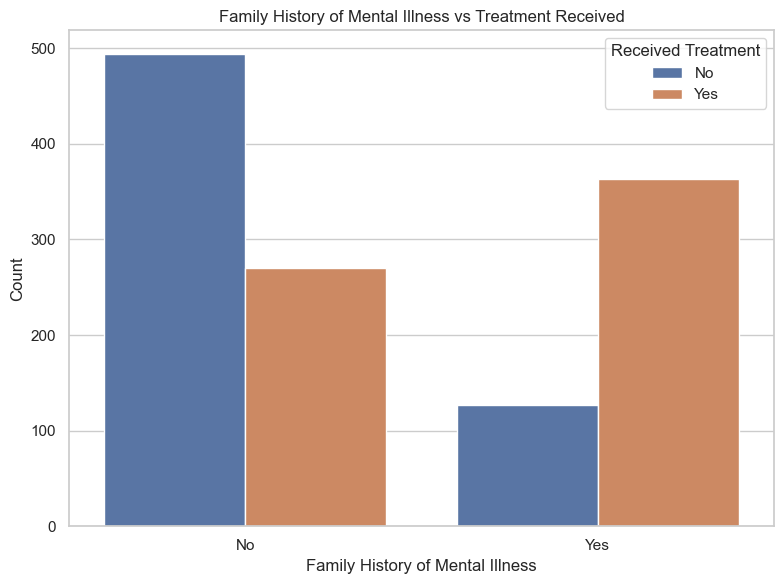

In [88]:
# Standardize categories
df['family_history_str'] = df['family_history'].astype(str).str.strip().str.lower()
# Map to 'No' and 'Yes'
df['family_history_cat'] = df['family_history_str'].map({ 'no': 'No', 'yes': 'Yes' })

df['treatment_str'] = df['treatment'].astype(str).str.strip().str.lower()
df['treatment_cat'] = df['treatment_str'].map({ 'no': 'No', 'yes': 'Yes' })

# Group counts
family_treatment_counts = df.groupby(['family_history_cat', 'treatment_cat']).size().reset_index(name='counts')

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x='family_history_cat', y='counts', hue='treatment_cat', data=family_treatment_counts)

plt.title('Family History of Mental Illness vs Treatment Received')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Count')
plt.legend(title='Received Treatment')
plt.tight_layout()
plt.show()


The clustered bar chart is plotted to confirm the observations from the correlation matrix. Clearly, when there is a family history, candidates tend to get treatment without hesitation. This proves that family history is another important factor in deciding the openness of the employee in communicating mental health issues and getting the treatment.

#### Treatment Vs Work Interference

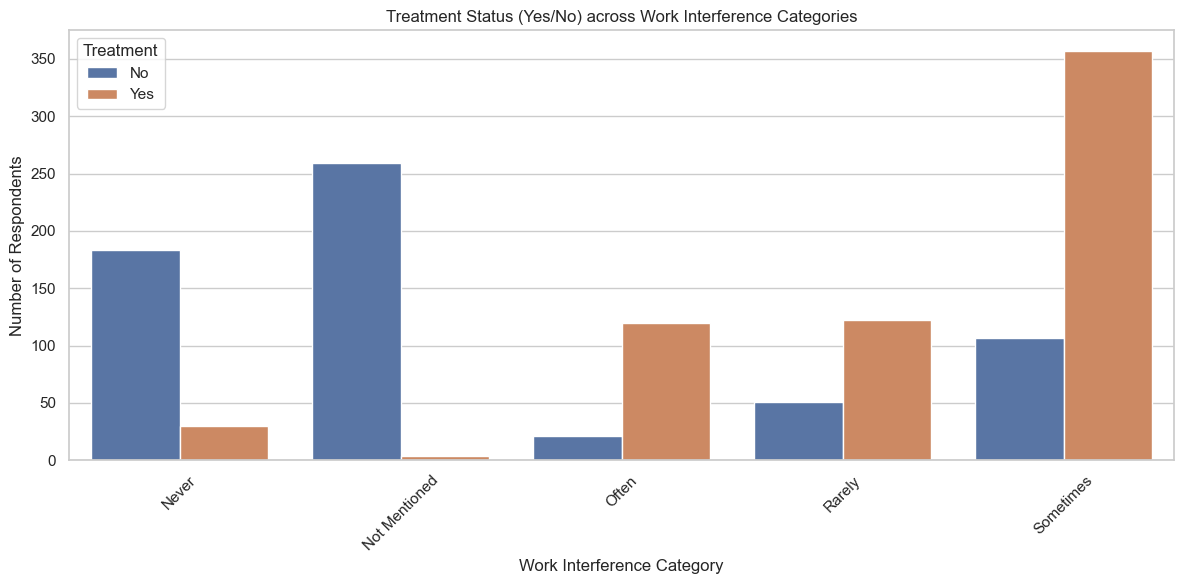

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, ensure 'work_interfere' and 'treatment' are string types
df['work_interfere'] = df['work_interfere'].astype(str).str.strip()
df['treatment'] = df['treatment'].astype(str).str.strip()

# Create a combined DataFrame for counts
counts = df.groupby(['work_interfere', 'treatment']).size().reset_index(name='counts')

# Plot grouped bar chart
plt.figure(figsize=(12,6))
sns.barplot(
    x='work_interfere',
    y='counts',
    hue='treatment',
    data=counts,
)

plt.title('Treatment Status (Yes/No) across Work Interference Categories')
plt.xlabel('Work Interference Category')
plt.ylabel('Number of Respondents')
plt.legend(title='Treatment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The candidates whose work are often and sometimes interfered tend to take more treatment. The ones who did not mention whether their work is interefered hardly takes treatment. So people who are open with, tends to be open to treatments. This shows a direct correlation.

#### Age Distribution by Gender and Treatment

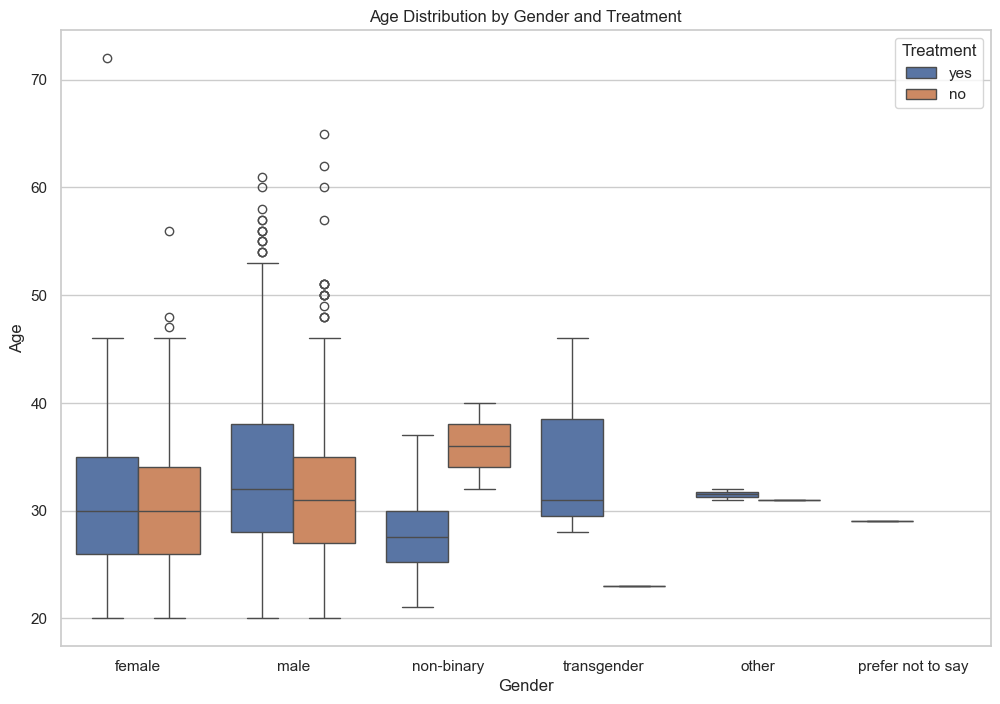

In [90]:
# Convert 'treatment' and 'Gender' to lowercase for consistency
df['treatment_str'] = df['treatment'].astype(str).str.strip().str.lower()
df['gender_str'] = df['Gender'].astype(str).str.strip().str.lower()

# Create a boxplot of Age grouped by Gender and Treatment
plt.figure(figsize=(12,8))
sns.boxplot(
    x='gender_str',
    y='Age',
    hue='treatment_str',
    data=df,
)

plt.title('Age Distribution by Gender and Treatment')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Treatment')
plt.show()


The median age for those not undergoing treatment is slightly higher than for those receiving treatment across most gender groups, indicating younger individuals tend to seek treatment more.

#### Insights from the Analysis

 The strongest predictors of mental health illness or certain attitudes towards mental health in the workplace from all the above analysises are:

* **Family History of Mental Illness:** Respondents with a family history are significantly more likely to experience work interference and seek treatment.
* **Demographics (Age & Gender):** Younger employees and females are generally more open to discussing mental health and seeking help.
* **Work Interference:** When the work is interfered, the employees tend to seek help. Hence, it has amoderate correlation.
* **Perceptions of Negative Consequences:** Employees who believe discussing mental health could have negative repercussions are less likely to seek help, indicating stigma influences behavior. negative attitude from co-workers have a negative impact on their choices of expresion.

### **E. Geographical Analysis**

Here, The analysis and comparisson of the prevalence and perceptions of mental health issues across different countries is performed to uncover regional disparities. The dataset has 48 countries. However, the data is not balanced. Hence, the top 10 countries are taken and analysed.

In [91]:
# Extracting the top 10 countries
top10_countries = df['Country'].value_counts().head(10).index
df_top10 = df[df['Country'].isin(top10_countries)]

#### Country Vs Work Interference

C:\Users\USER\AppData\Local\Temp\ipykernel_13920\1395988939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10['work_interfere'] = df_top10['work_interfere'].astype(str).str.strip()


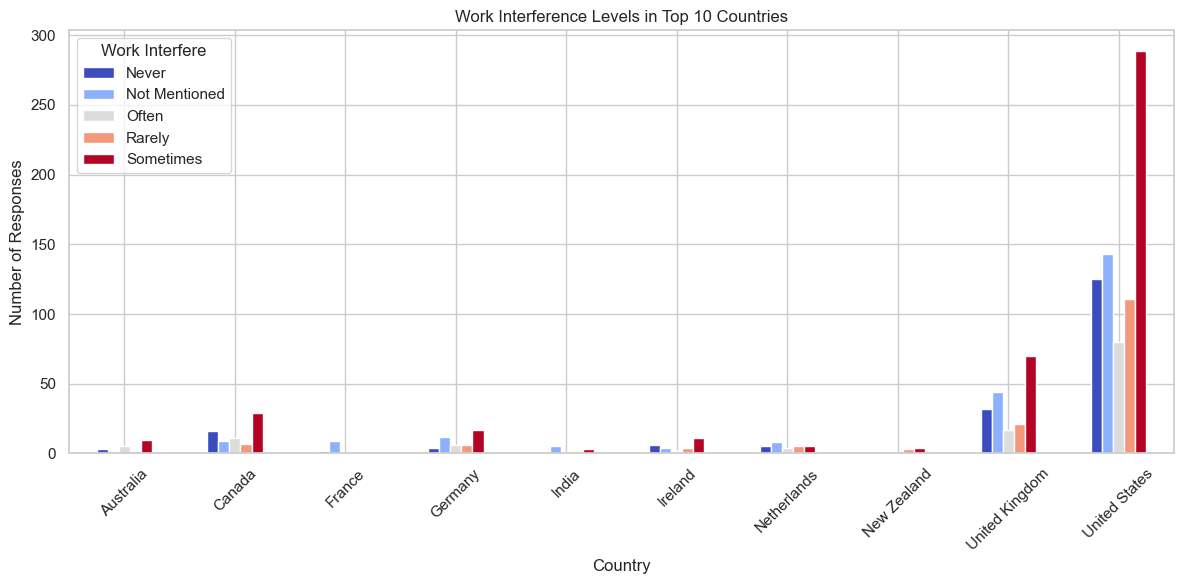

In [103]:
# Create a binary for 'work_interfere' categories
df_top10['work_interfere'] = df_top10['work_interfere'].astype(str).str.strip()
# Count 'Often', 'Sometimes', etc.
interfere_counts = df_top10.groupby(['Country', 'work_interfere']).size().reset_index(name='counts')

# Pivot for plotting
interfere_pivot = interfere_counts.pivot(index='Country', columns='work_interfere', values='counts').fillna(0)

# Plot
interfere_pivot.plot(kind='bar', stacked=False, figsize=(12,6), cmap='coolwarm')
plt.title('Work Interference Levels in Top 10 Countries')
plt.ylabel('Number of Responses')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Work Interfere')
plt.tight_layout()
plt.show()


The bar chart displays the levels of work interference reported across the top 10 countries in the dataset. Each color represents a different degree of interference, ranging from "Never" to "Sometimes," with "Not Mentioned" also included. The United States shows a broad distribution of responses across all interference levels, indicating a wide variation in how employees experience work-related mental health challenges. Countries like the United Kingdom and Canada also exhibit noticeable interference, though with fewer responses compared to the U.S. The remaining countries, including Australia, New Zealand, Germany, and others, tend to report lower levels of interference overall. These insights highlight regional differences in work interference related to mental health, which could guide targeted workplace support policies and intervention strategies.

#### Countries where employers provide more help

C:\Users\USER\AppData\Local\Temp\ipykernel_13920\2762253120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10['seek_help_str'] = df_top10['seek_help'].astype(str).str.strip().str.lower()


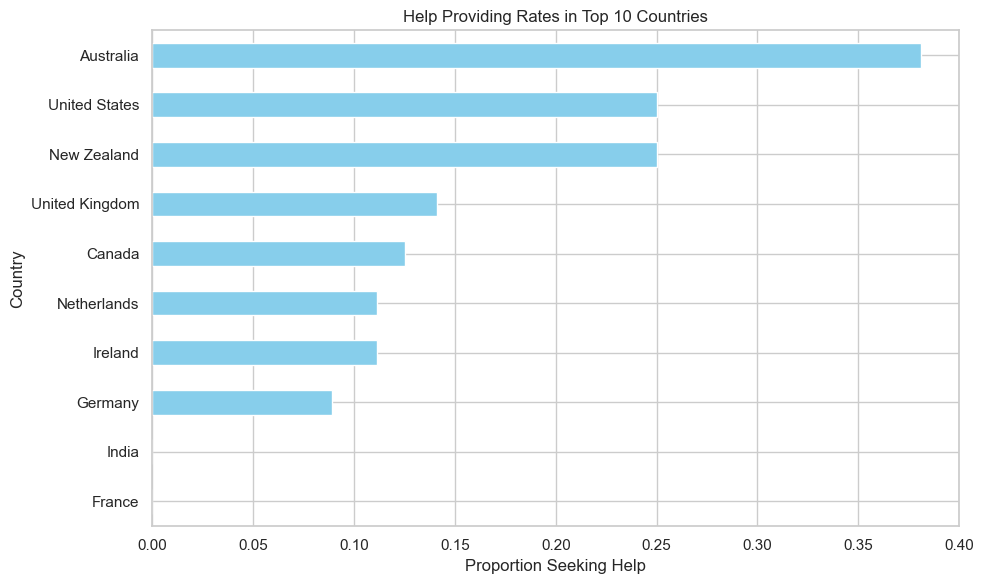

In [104]:
# Proportion seeking help
df_top10['seek_help_str'] = df_top10['seek_help'].astype(str).str.strip().str.lower()
help_rates = df_top10.groupby('Country')['seek_help_str'].apply(lambda s: (s=='yes').mean())

# Plot
help_rates.sort_values().plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title('Help Providing Rates in Top 10 Countries')
plt.xlabel('Proportion Seeking Help')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


This bar chart illustrates the help providing rates across the top 10 countries in your dataset. Australia leads with the highest proportion of respondents reporting that their employer provides mental health resources, followed by the United States. New Zealand and the United Kingdom also show relatively high rates, while countries like Germany and Ireland have moderate levels. The remaining countries, including Canada, the Netherlands, and France, exhibit lower help-seeking rates. These differences highlight regional variations in employer support for mental health, which can inform targeted interventions and policy improvements to promote better access to mental health resources worldwide.

#### Countries Vs Negative consequences

C:\Users\USER\AppData\Local\Temp\ipykernel_13920\2386250566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10['mental_health_consequence_str'] = df_top10['mental_health_consequence'].astype(str).str.strip().str.lower()
C:\Users\USER\AppData\Local\Temp\ipykernel_13920\2386250566.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perception_rates.values, y=perception_rates.index, palette='coolwarm')


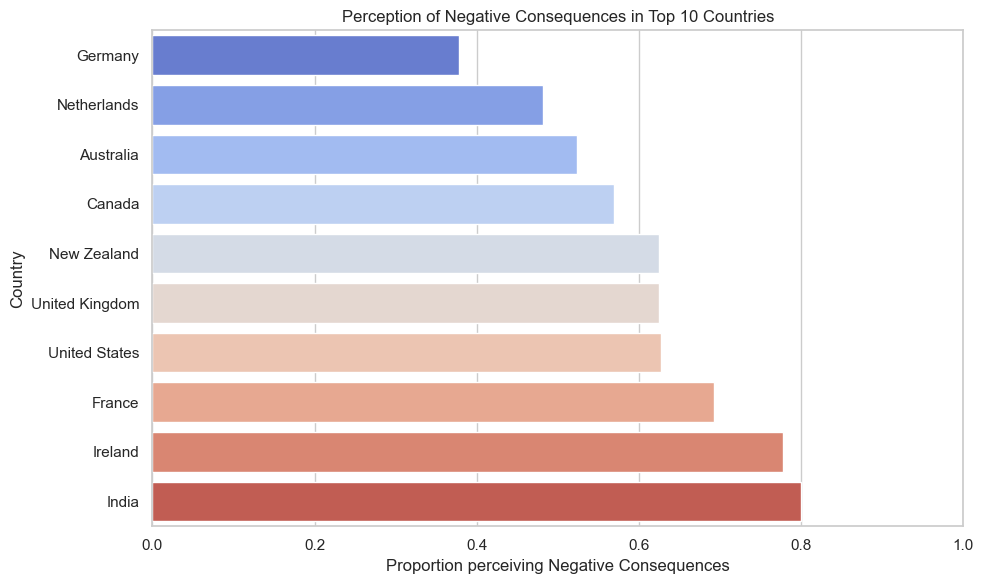

In [94]:
# Convert responses to lowercase for consistency
df_top10['mental_health_consequence_str'] = df_top10['mental_health_consequence'].astype(str).str.strip().str.lower()

# Calculate proportion of respondents who think discussing mental health has negative consequences ('yes' or similar)
# Assuming 'yes' indicates negative perception
perception_rates = df_top10.groupby('Country')['mental_health_consequence_str'].apply(lambda s: (s.str.contains('yes') | s.str.contains('maybe')).mean())

# Sort countries for better visualization
perception_rates = perception_rates.sort_values()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=perception_rates.values, y=perception_rates.index, palette='coolwarm')
plt.xlabel('Proportion perceiving Negative Consequences')
plt.ylabel('Country')
plt.title('Perception of Negative Consequences in Top 10 Countries')
plt.xlim(0,1)
plt.tight_layout()
plt.show()


This horizontal bar chart shows the proportion of respondents in the top 10 countries who perceive negative consequences associated with discussing mental health issues at work. Ireland and India have the highest perceived risks, indicating greater stigma or fear of repercussions, while Germany and the Netherlands report lower perceptions of negative consequences. These insights highlight regional differences in workplace attitudes toward mental health, emphasizing the need for cultural and policy interventions to reduce stigma and promote open dialogue about mental health challenges.

## **5. Solution to Business Objective**

Based on the comprehensive analysis, here are key recommendations for business leaders and HR professionals:

##### 1. **Ensure a Balanced and Inclusive Survey Approach**
When conducting future surveys or assessments, strive for a diverse and balanced respondent pool, especially across all genders, age groups, and regions—to accurately identify issues and develop fair, inclusive strategies.

##### 2. **Increase Awareness and Promote Wellness Programs**
Highlight the importance of awareness campaigns and implement wellness initiatives that focus on mental health. Educate employees about mental health, reduce stigma, and normalize seeking help, emphasizing that mental health issues are as vital as physical health.

##### 3. **Safeguard Privacy and Confidentiality**
Create a secure and confidential environment where employees feel safe to disclose mental health concerns without fear of judgment or repercussions. Privacy assurance is crucial for fostering openness.

##### 4. **Cultivate a Supportive and Open Culture**
Develop a workplace culture that encourages open dialogue among coworkers and team members about mental health. Consider regular mental health discussions as integral as physical health check-ins. Foster trust and empathy within teams.

##### 5. **Consider Key Factors During Policy Development**
Pay attention to factors such as:
- **Family history and individual attitudes**, which influence help-seeking behavior
- **Gender issues**, recognizing that males often feel less comfortable opening up
- **Age-related tendencies**, such as younger employees overworking or appearing unaffected
- **Organizational support and attitude** toward mental health, which significantly impact employee behavior

##### 6. **Address Cultural and Societal Attitudes**
Acknowledge country and society-specific attitudes toward mental health. For instance, countries like India and Ireland may require targeted efforts to reduce stigma and establish supportive environments, whereas the US, Canada, and the UK generally exhibit more openness. Tailor strategies to regional cultural contexts.


Implementing these recommendations can lead to a healthier, more supportive workplace that recognizes mental health as equally important, leading to increased productivity, reduced stigma, and better overall employee well-being.

# **Conclusion**

This project underscores the critical importance of mental health in the workplace, revealing significant disparities influenced by social stigma, culture, and organizational support across different regions. Social stigma continues to act as a barrier, preventing many individuals from seeking help or discussing mental health issues openly. As a society and as individuals, it is our collective responsibility to challenge these misconceptions, promote awareness, and foster environments where mental health is treated with the same importance as physical health. By working together to reduce stigma, encouraging open dialogue, and implementing supportive policies, we can build healthier communities and workplaces where everyone feels safe, understood, and empowered to seek help without fear of judgment.